# Computer Vision - Convolutional Neural Network

In [1]:
# Importing TF and checking the version
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
# Get data from https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
import zipfile

# Unzip the data
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [3]:
# Check the structure
!dir /b pizza_steak

test
train


In [4]:
# Walk through the dir structure
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}.")

There are 2 directories and 0 files in pizza_steak.
There are 2 directories and 0 files in pizza_steak\test.
There are 0 directories and 250 files in pizza_steak\test\pizza.
There are 0 directories and 250 files in pizza_steak\test\steak.
There are 2 directories and 0 files in pizza_steak\train.
There are 0 directories and 750 files in pizza_steak\train\pizza.
There are 0 directories and 750 files in pizza_steak\train\steak.


In [5]:
# Another way to find out how many images are in the target directory
num_steak_images_train = len(os.listdir("pizza_steak/train/steak/"))
num_steak_images_train

750

In [6]:
# Get the classnames programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted(item.name for item in data_dir.glob("*")))
print(class_names)

['pizza' 'steak']


In [7]:
# Function to visialise our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")
    return img


Image shape: (512, 512, 3)


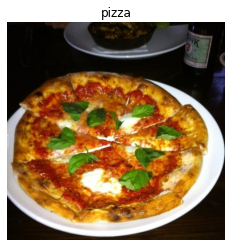

In [8]:
# Viewing random image
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

In [9]:
# Pre-processing image into tensor
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[15, 11,  8],
        [15, 11,  8],
        [16, 12,  9],
        ...,
        [ 4,  3,  1],
        [ 4,  3,  1],
        [ 4,  3,  1]],

       [[15, 11,  8],
        [15, 11,  8],
        [15, 11,  8],
        ...,
        [ 4,  3,  1],
        [ 4,  3,  1],
        [ 4,  3,  1]],

       [[14, 10,  7],
        [14, 10,  7],
        [15, 11,  8],
        ...,
        [ 4,  3,  1],
        [ 4,  3,  1],
        [ 4,  3,  1]],

       ...,

       [[11,  6,  0],
        [11,  6,  0],
        [11,  6,  0],
        ...,
        [26, 16,  7],
        [23, 13,  4],
        [20, 10,  1]],

       [[10,  5,  0],
        [10,  5,  0],
        [10,  5,  0],
        ...,
        [29, 16,  8],
        [27, 14,  6],
        [25, 12,  4]],

       [[10,  5,  0],
        [10,  5,  0],
        [10,  5,  0],
        ...,
        [27, 14,  6],
        [27, 14,  6],
        [26, 13,  5]]], dtype=uint8)>

In [10]:
# Get all the pixel values between 0 and 1
img / 255.

array([[[0.05882353, 0.04313725, 0.03137255],
        [0.05882353, 0.04313725, 0.03137255],
        [0.0627451 , 0.04705882, 0.03529412],
        ...,
        [0.01568627, 0.01176471, 0.00392157],
        [0.01568627, 0.01176471, 0.00392157],
        [0.01568627, 0.01176471, 0.00392157]],

       [[0.05882353, 0.04313725, 0.03137255],
        [0.05882353, 0.04313725, 0.03137255],
        [0.05882353, 0.04313725, 0.03137255],
        ...,
        [0.01568627, 0.01176471, 0.00392157],
        [0.01568627, 0.01176471, 0.00392157],
        [0.01568627, 0.01176471, 0.00392157]],

       [[0.05490196, 0.03921569, 0.02745098],
        [0.05490196, 0.03921569, 0.02745098],
        [0.05882353, 0.04313725, 0.03137255],
        ...,
        [0.01568627, 0.01176471, 0.00392157],
        [0.01568627, 0.01176471, 0.00392157],
        [0.01568627, 0.01176471, 0.00392157]],

       ...,

       [[0.04313725, 0.02352941, 0.        ],
        [0.04313725, 0.02352941, 0.        ],
        [0.04313725, 0

## Building CNN Model

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocess the data (pixels between 0 and 1), i.e. scaling/normalisation
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set path to the image directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data and turn it into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)
valid_data = valid_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

# Building CNN model
model_cnn1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu",
        input_shape=(224, 224, 3)
    ),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(
        pool_size=2,
        padding="valid"
    ),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_cnn1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_cnn1 = model_cnn1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 48s 995ms/step - loss: 0.6128 - accuracy: 0.6840 - val_loss: 0.4660 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 40s 847ms/step - loss: 0.4608 - accuracy: 0.7927 - val_loss: 0.4846 - val_accuracy: 0.7420
Epoch 3/5
47/47 [==============================] - 40s 857ms/step - loss: 0.4287 - accuracy: 0.8153 - val_loss: 0.3980 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 37s 782ms/step - loss: 0.3889 - accuracy: 0.8393 - val_loss: 0.3670 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 38s 808ms/step - loss: 0.3059 - accuracy: 0.8767 - val_loss: 0.4160 - val_accuracy: 0.8060


In [12]:
# Understanding the epoch steps
len(train_data)

47

In [13]:
# Number of images divided by the batch size
1500 / 32

46.875